# Import Required Libraries
Import necessary libraries such as pandas, seaborn, matplotlib, and scikit-learn.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Load and Combine Datasets
Load the pricing, generation, demand, and balancing data from 2018 to 2024 and combine them into a single DataFrame.

In [2]:
# Load and Combine Datasets

# Load imputed data
balancing_data = pd.read_csv('../data/balancing_data_imputed.csv', parse_dates=['GMT Time'])
price_data = pd.read_csv('../data/price_data_imputed.csv', parse_dates=['GMT Time'])
generation_data = pd.read_csv('../data/generation_data_imputed.csv', parse_dates=['GMT Time'])
demand_load_data = pd.read_csv('../data/demand_load_data_imputed.csv', parse_dates=['GMT Time'])

# Combine all datasets into one for EDA
data = balancing_data.merge(price_data, on='GMT Time', how='inner')
data = data.merge(generation_data, on='GMT Time', how='inner')
data = data.merge(demand_load_data, on='GMT Time', how='inner')

# Display the first few rows of the combined dataset
data.head()

,GMT Time,System Price (ESO Outturn) - GB (£/MWh),NIV Outturn (+ve long) - GB (MW),BM Bid Acceptances (total) - GB (MW),BM Offer Acceptances (total) - GB (MW),Total BSAD Volume - Turn Up - GB (MW),Total BSAD Volume - Turn Down - GB (MW),Total BSAD Volume - Total - GB (MW),"Intraday Volume (EPEX Outturn, APX, MID) - GB (MWh)","Day Ahead Price (EPEX half-hourly, local) - GB (LC/MWh)",...,Actual Aggregated Generation By Type - Fossil Oil - GB (MW),Actual Aggregated Generation By Type - Hydro Pumped Storage - GB (MW),Actual Aggregated Generation By Type - Hydro Run-of-River and Poundage - GB (MW),Actual Aggregated Generation By Type - Nuclear - GB (MW),Actual Aggregated Generation By Type - Solar - GB (MW),Actual Aggregated Generation By Type - Wind Onshore - GB (MW),Actual Aggregated Generation By Type - Wind Offshore - GB (MW),Loss of Load Probability - Latest - GB (),Actual Total Load - GB (MW),Demand Outturn (ITSDO) - GB (MW)
0,2018-01-01 00:00:00,55.94,-77.05,-1833.86,1910.98,1104.0,-900.0,204.0,781.35,46.73,...,0.0,0.0,352.0,7263.0,0.0,4950.30,3777.01,0.0,30303.0,26413.0
1,2018-01-01 00:30:00,55.94,-334.76,-1443.78,1778.09,1104.0,-900.0,204.0,655.40,50.11,...,0.0,0.0,351.0,7268.0,0.0,5004.55,3824.89,0.0,31096.0,27130.0
2,2018-01-01 01:00:00,62.94,-219.78,-1580.12,1799.90,1104.0,-900.0,204.0,821.50,56.60,...,0.0,206.0,355.0,7260.0,0.0,4878.41,3831.16,0.0,30599.0,27378.0
3,2018-01-01 01:30:00,31.00,286.63,-1699.05,1413.04,1104.0,-900.0,204.0,815.20,51.83,...,0.0,0.0,349.0,7258.0,0.0,4969.68,3811.42,0.0,29402.0,26746.0
4,2018-01-01 02:00:00,60.81,-141.41,-1413.27,1554.31,1104.0,-1050.0,54.0,709.05,46.23,...,0.0,0.0,340.0,7264.0,0.0,4720.91,3819.08,0.0,28096.0,26169.0


# Exploratory Data Analysis (EDA)
Perform EDA to understand the data distribution, identify patterns, and visualize correlations between variables.

In [3]:
data.columns


Index(['GMT Time', 'System Price (ESO Outturn) - GB (£/MWh)',
       'NIV Outturn (+ve long) - GB (MW)',
       'BM Bid Acceptances (total) - GB (MW)',
       'BM Offer Acceptances (total) - GB (MW)',
       'Total BSAD Volume - Turn Up - GB (MW)',
       'Total BSAD Volume - Turn Down - GB (MW)',
       'Total BSAD Volume - Total - GB (MW)',
       'Intraday Volume (EPEX Outturn, APX, MID) - GB (MWh)',
       'Day Ahead Price (EPEX half-hourly, local) - GB (LC/MWh)',
       'Intraday Price (EPEX Outturn, APX, MID) - GB (£/MWh)',
       'Actual Aggregated Generation By Type - Biomass - GB (MW)',
       'Actual Aggregated Generation By Type - Fossil Gas - GB (MW)',
       'Actual Aggregated Generation By Type - Fossil Hard Coal - GB (MW)',
       'Actual Aggregated Generation By Type - Fossil Oil - GB (MW)',
       'Actual Aggregated Generation By Type - Hydro Pumped Storage - GB (MW)',
       'Actual Aggregated Generation By Type - Hydro Run-of-River and Poundage - GB (MW)',
       'Ac

Index(['GMT Time', 'System Price (ESO Outturn) - GB (£/MWh)',
       'NIV Outturn (+ve long) - GB (MW)',
       'BM Bid Acceptances (total) - GB (MW)',
       'BM Offer Acceptances (total) - GB (MW)',
       'Total BSAD Volume - Turn Up - GB (MW)',
       'Total BSAD Volume - Turn Down - GB (MW)',
       'Total BSAD Volume - Total - GB (MW)',
       'Intraday Volume (EPEX Outturn, APX, MID) - GB (MWh)',
       'Day Ahead Price (EPEX half-hourly, local) - GB (LC/MWh)',
       'Intraday Price (EPEX Outturn, APX, MID) - GB (£/MWh)',
       'Actual Aggregated Generation By Type - Biomass - GB (MW)',
       'Actual Aggregated Generation By Type - Fossil Gas - GB (MW)',
       'Actual Aggregated Generation By Type - Fossil Hard Coal - GB (MW)',
       'Actual Aggregated Generation By Type - Fossil Oil - GB (MW)',
       'Actual Aggregated Generation By Type - Hydro Pumped Storage - GB (MW)',
       'Actual Aggregated Generation By Type - Hydro Run-of-River and Poundage - GB (MW)',
       'Ac

,GMT Time,System Price (ESO Outturn) - GB (£/MWh),NIV Outturn (+ve long) - GB (MW),BM Bid Acceptances (total) - GB (MW),BM Offer Acceptances (total) - GB (MW),Total BSAD Volume - Turn Up - GB (MW),Total BSAD Volume - Turn Down - GB (MW),Total BSAD Volume - Total - GB (MW),"Intraday Volume (EPEX Outturn, APX, MID) - GB (MWh)","Day Ahead Price (EPEX half-hourly, local) - GB (LC/MWh)",...,Actual Aggregated Generation By Type - Fossil Oil - GB (MW),Actual Aggregated Generation By Type - Hydro Pumped Storage - GB (MW),Actual Aggregated Generation By Type - Hydro Run-of-River and Poundage - GB (MW),Actual Aggregated Generation By Type - Nuclear - GB (MW),Actual Aggregated Generation By Type - Solar - GB (MW),Actual Aggregated Generation By Type - Wind Onshore - GB (MW),Actual Aggregated Generation By Type - Wind Offshore - GB (MW),Loss of Load Probability - Latest - GB (),Actual Total Load - GB (MW),Demand Outturn (ITSDO) - GB (MW)
count,118320,118320.000000,118320.000000,118320.000000,118320.000000,118320.000000,118320.000000,118320.000000,118320.000000,118320.000000,...,118320.000000,118320.000000,118320.000000,118320.000000,118320.000000,118320.000000,118320.000000,118320.000000,118320.000000,118320.000000
mean,2021-05-17 11:45:00.000000256,87.632019,15.735880,-1568.960369,1552.423677,409.711537,-438.689657,-28.915977,1241.258832,89.049041,...,0.000649,214.401692,381.761358,5196.020949,1315.915095,2999.724798,2660.156220,0.000133,32522.401516,29378.715134
min,2018-01-01 00:00:00,-185.330000,-4954.350000,-11283.670000,-2073.287007,-214.792014,-6226.000000,-6226.000000,0.000000,-86.300000,...,-2.223902,-1119.256918,-417.505887,0.000000,-5754.158166,-3521.524326,-5845.166742,-0.009052,203.000000,16648.000000
25%,2019-09-09 05:52:30,38.800000,-357.072500,-2188.480000,680.812500,88.670000,-555.000000,-307.579034,772.200000,43.700000,...,0.000000,0.000000,178.000000,4551.000000,0.000000,1341.042500,797.615000,0.000000,26665.000000,24680.000000
50%,2021-05-17 11:45:00,60.950000,0.000000,-1278.490000,1291.760000,308.446824,-227.090110,31.616218,1160.625000,64.100000,...,0.000000,1.000000,354.202906,5195.000000,26.000000,2534.920000,2053.870000,0.000000,32770.000000,28558.000000
75%,2023-01-23 17:37:30,108.000000,389.200000,-690.102500,2199.992500,509.319370,-0.106173,317.000000,1609.650000,102.500000,...,0.000000,300.000000,548.000000,6153.000000,2130.000000,4325.055000,4063.427500,0.000000,38258.250000,33095.000000
max,2024-09-30 23:30:00,4037.800000,4566.920000,1587.970126,10270.560000,6200.000000,1947.271774,6200.000000,4991.000000,2500.000000,...,103.000000,2473.000000,1424.000000,8330.000000,10322.000000,11207.950000,11631.920000,0.700000,71273.000000,50499.000000
std,NaN,103.060766,654.902376,1158.155618,1140.839592,465.234890,655.467412,788.950129,637.422808,81.342780,...,0.312839,357.524186,244.537017,1429.363504,2020.386213,2006.405609,2263.782228,0.005384,7942.955138,6116.112526


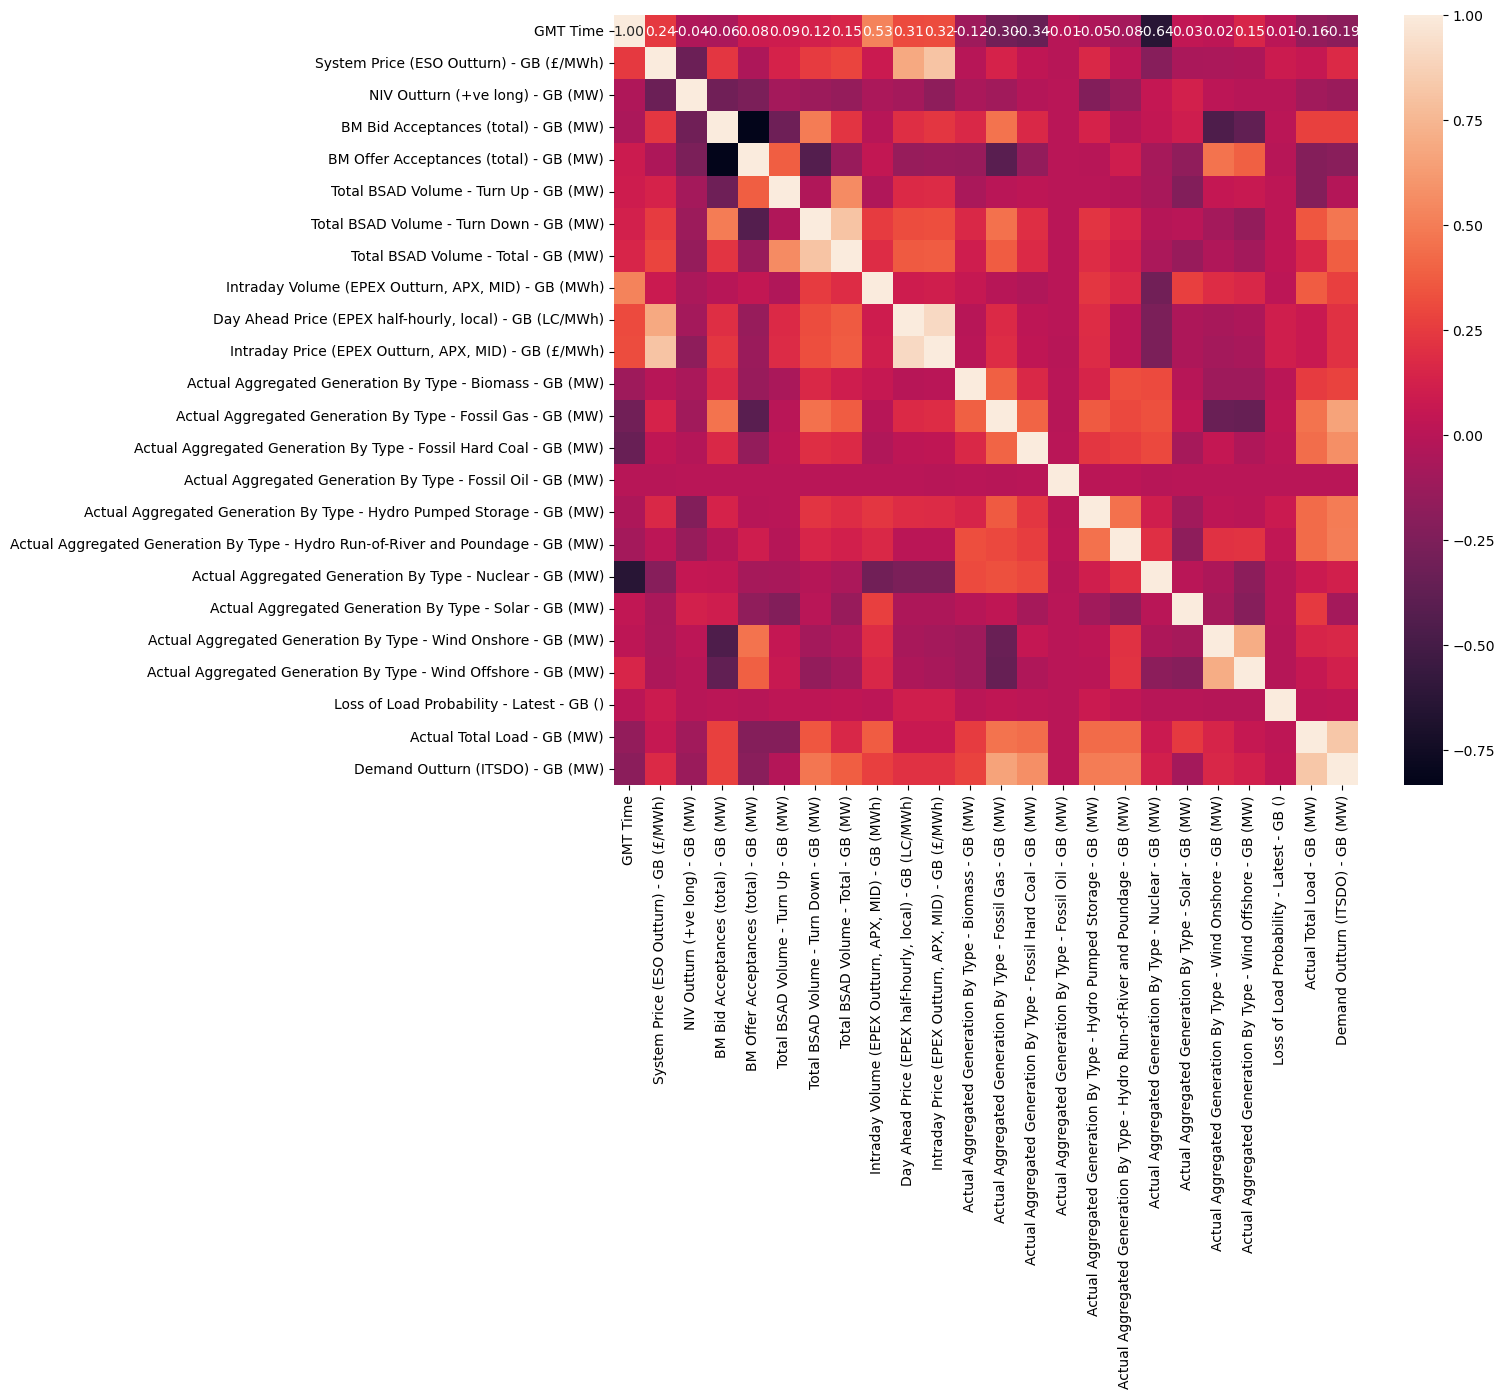

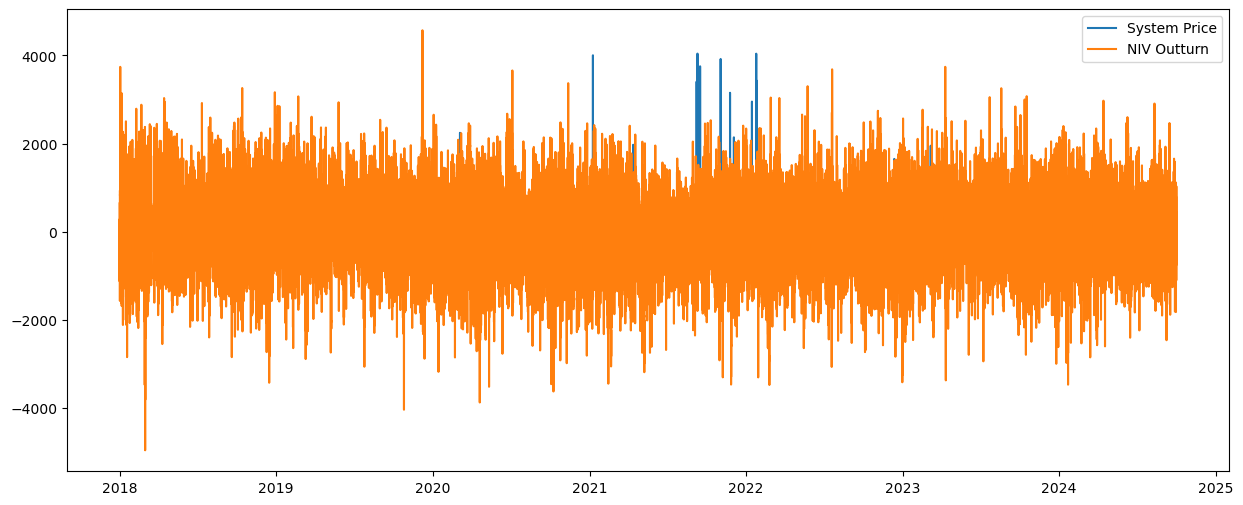

/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


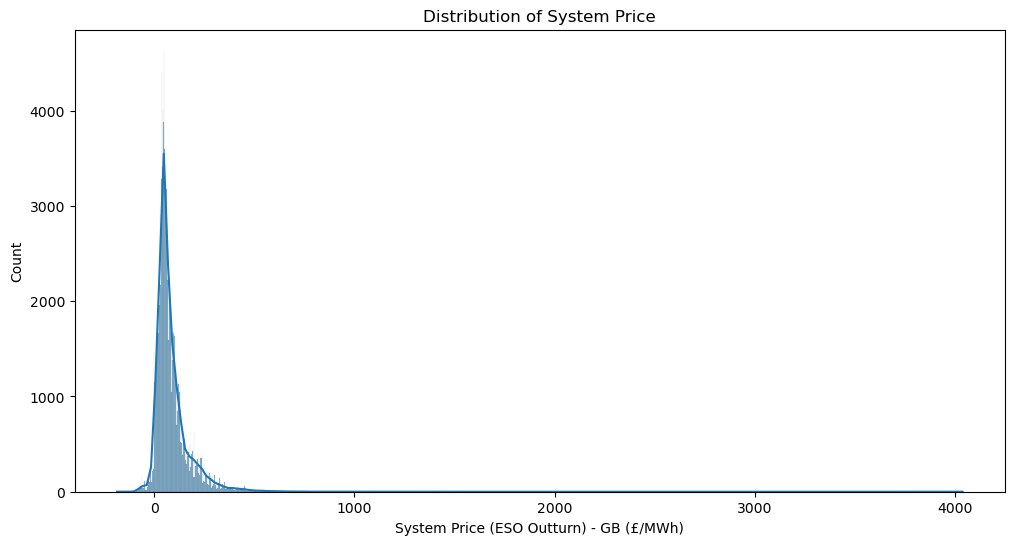

/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


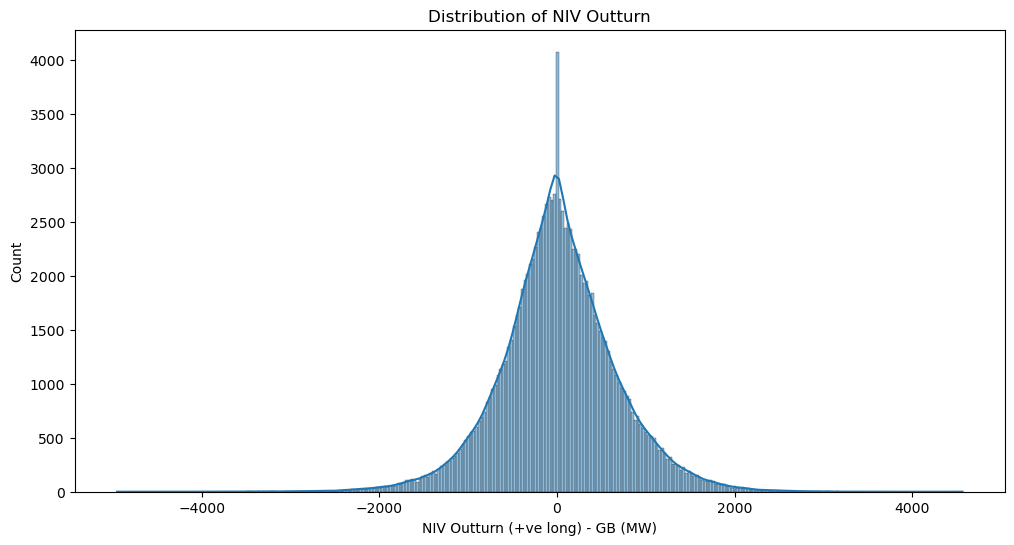

/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/seaborn/_oldcore.py

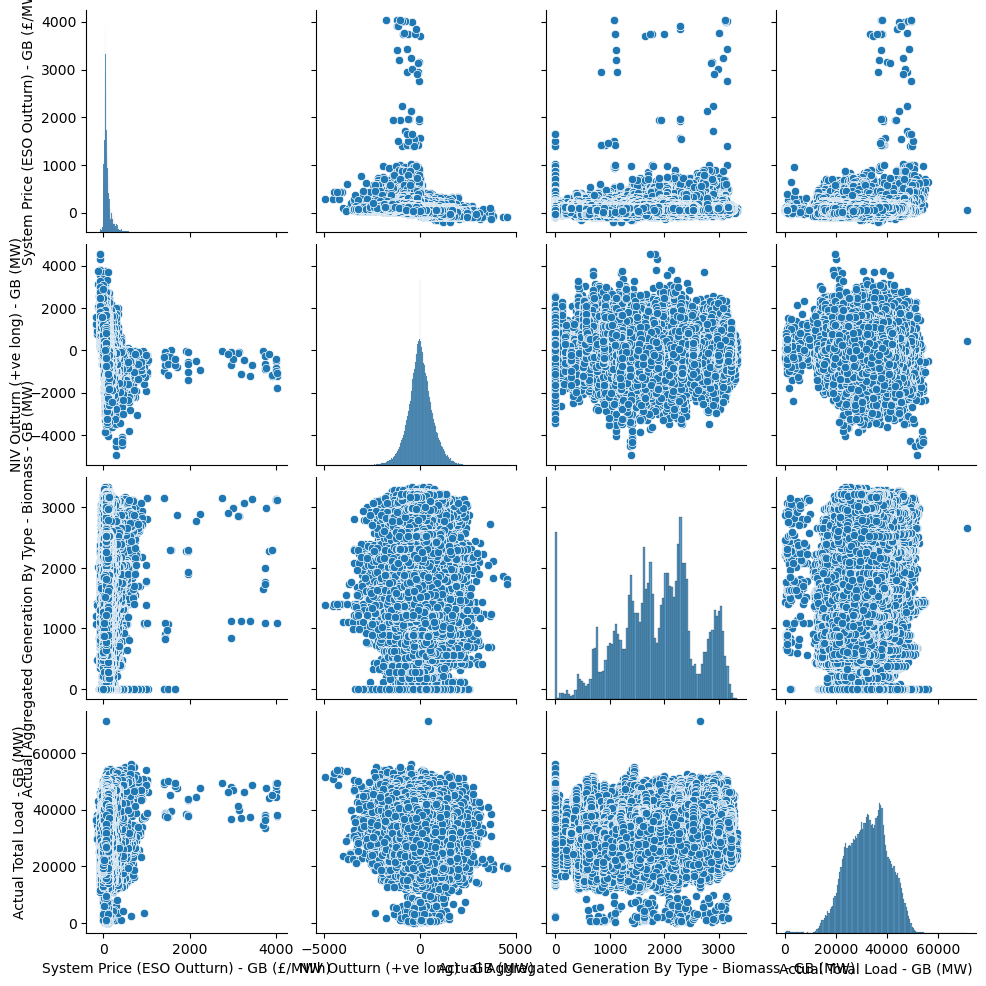

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# List all columns
print(data.columns)

# Statistical summary
display(data.describe())

# Correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=True, fmt=".2f")
plt.show()

# Time series plots
plt.figure(figsize=(15, 6))
plt.plot(data['GMT Time'], data['System Price (ESO Outturn) - GB (£/MWh)'], label='System Price')
plt.plot(data['GMT Time'], data['NIV Outturn (+ve long) - GB (MW)'], label='NIV Outturn')
plt.legend()
plt.show()

# Distribution plots
plt.figure(figsize=(12, 6))
sns.histplot(data['System Price (ESO Outturn) - GB (£/MWh)'], kde=True)
plt.title('Distribution of System Price')
plt.show()

plt.figure(figsize=(12, 6))
sns.histplot(data['NIV Outturn (+ve long) - GB (MW)'], kde=True)
plt.title('Distribution of NIV Outturn')
plt.show()

# Update selected features based on correct column names
selected_features = [
    'System Price (ESO Outturn) - GB (£/MWh)', 
    'NIV Outturn (+ve long) - GB (MW)', 
    'Actual Aggregated Generation By Type - Biomass - GB (MW)', 
    'Actual Total Load - GB (MW)'
]

# Pairplot for selected features
sns.pairplot(data[selected_features])
plt.show()

# Feature Engineering
Create new features from the existing data to improve model performance, such as lag features, rolling statistics, and time-based features.

In [5]:
# Feature Engineering

# Create lag features
data['System Price Lag1'] = data['System Price (ESO Outturn) - GB (£/MWh)'].shift(1)
data['NIV Outturn Lag1'] = data['NIV Outturn (+ve long) - GB (MW)'].shift(1)

# Create rolling statistics features
data['System Price Rolling Mean'] = data['System Price (ESO Outturn) - GB (£/MWh)'].rolling(window=3).mean()
data['NIV Outturn Rolling Mean'] = data['NIV Outturn (+ve long) - GB (MW)'].rolling(window=3).mean()

# Create time-based features
data['Hour'] = data['GMT Time'].dt.hour
data['Day'] = data['GMT Time'].dt.day
data['Month'] = data['GMT Time'].dt.month
data['Day of Week'] = data['GMT Time'].dt.dayofweek

# Drop rows with NaN values created by lag and rolling features
data.dropna(inplace=True)

# Display the first few rows of the dataset with new features
data.head()

,GMT Time,System Price (ESO Outturn) - GB (£/MWh),NIV Outturn (+ve long) - GB (MW),BM Bid Acceptances (total) - GB (MW),BM Offer Acceptances (total) - GB (MW),Total BSAD Volume - Turn Up - GB (MW),Total BSAD Volume - Turn Down - GB (MW),Total BSAD Volume - Total - GB (MW),"Intraday Volume (EPEX Outturn, APX, MID) - GB (MWh)","Day Ahead Price (EPEX half-hourly, local) - GB (LC/MWh)",...,Actual Total Load - GB (MW),Demand Outturn (ITSDO) - GB (MW),System Price Lag1,NIV Outturn Lag1,System Price Rolling Mean,NIV Outturn Rolling Mean,Hour,Day,Month,Day of Week
2,2018-01-01 01:00:00,62.94,-219.78,-1580.12,1799.90,1104.0,-900.0,204.0,821.50,56.60,...,30599.0,27378.0,55.94,-334.76,58.273333,-210.530000,1,1,1,0
3,2018-01-01 01:30:00,31.00,286.63,-1699.05,1413.04,1104.0,-900.0,204.0,815.20,51.83,...,29402.0,26746.0,62.94,-219.78,49.960000,-89.303333,1,1,1,0
4,2018-01-01 02:00:00,60.81,-141.41,-1413.27,1554.31,1104.0,-1050.0,54.0,709.05,46.23,...,28096.0,26169.0,31.00,286.63,51.583333,-24.853333,2,1,1,0
5,2018-01-01 02:30:00,65.00,-306.98,-1226.12,1532.37,1104.0,-1050.0,54.0,649.60,46.08,...,27278.0,25759.0,60.81,-141.41,52.270000,-53.920000,2,1,1,0
6,2018-01-01 03:00:00,67.86,-766.96,-1059.74,1826.06,1104.0,-1050.0,54.0,551.35,38.90,...,25882.0,25482.0,65.00,-306.98,64.556667,-405.116667,3,1,1,0


# Model Development
Develop predictive models for System Price and Net Imbalance Volume using algorithms like Linear Regression, Random Forest, and XGBoost.

In [7]:
# Model Development

# Update features list with correct column names from the dataset
features = [
    'System Price Lag1', 
    'NIV Outturn Lag1', 
    'System Price Rolling Mean', 
    'NIV Outturn Rolling Mean',
    'Actual Total Load - GB (MW)',  # Instead of 'Total Demand - GB (MW)'
    'Hour', 
    'Day', 
    'Month', 
    'Day of Week'
]

# Rest of the code remains the same...

# Split the data into training and testing sets
X = data[features]
y_price = data[target_price]
y_niv = data[target_niv]

X_train, X_test, y_train_price, y_test_price = train_test_split(X, y_price, test_size=0.2, random_state=42)
X_train, X_test, y_train_niv, y_test_niv = train_test_split(X, y_niv, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Linear Regression Model for System Price
lr_price = LinearRegression()
lr_price.fit(X_train_scaled, y_train_price)
y_pred_price_lr = lr_price.predict(X_test_scaled)
rmse_price_lr = mean_squared_error(y_test_price, y_pred_price_lr, squared=False)

# Linear Regression Model for NIV Outturn
lr_niv = LinearRegression()
lr_niv.fit(X_train_scaled, y_train_niv)
y_pred_niv_lr = lr_niv.predict(X_test_scaled)
rmse_niv_lr = mean_squared_error(y_test_niv, y_pred_niv_lr, squared=False)

# Random Forest Model for System Price
from sklearn.ensemble import RandomForestRegressor

rf_price = RandomForestRegressor(random_state=42)
rf_price.fit(X_train, y_train_price)
y_pred_price_rf = rf_price.predict(X_test)
rmse_price_rf = mean_squared_error(y_test_price, y_pred_price_rf, squared=False)

# Random Forest Model for NIV Outturn
rf_niv = RandomForestRegressor(random_state=42)
rf_niv.fit(X_train, y_train_niv)
y_pred_niv_rf = rf_niv.predict(X_test)
rmse_niv_rf = mean_squared_error(y_test_niv, y_pred_niv_rf, squared=False)

# XGBoost Model for System Price
from xgboost import XGBRegressor

xgb_price = XGBRegressor(random_state=42)
xgb_price.fit(X_train, y_train_price)
y_pred_price_xgb = xgb_price.predict(X_test)
rmse_price_xgb = mean_squared_error(y_test_price, y_pred_price_xgb, squared=False)

# XGBoost Model for NIV Outturn
xgb_niv = XGBRegressor(random_state=42)
xgb_niv.fit(X_train, y_train_niv)
y_pred_niv_xgb = xgb_niv.predict(X_test)
rmse_niv_xgb = mean_squared_error(y_test_niv, y_pred_niv_xgb, squared=False)

# Display RMSE for all models
print(f'RMSE for System Price - Linear Regression: {rmse_price_lr}')
print(f'RMSE for System Price - Random Forest: {rmse_price_rf}')
print(f'RMSE for System Price - XGBoost: {rmse_price_xgb}')
print(f'RMSE for NIV Outturn - Linear Regression: {rmse_niv_lr}')
print(f'RMSE for NIV Outturn - Random Forest: {rmse_niv_rf}')
print(f'RMSE for NIV Outturn - XGBoost: {rmse_niv_xgb}')

/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/sklearn/metrics/_regression.

RMSE for System Price - Linear Regression: 35.88676221679017
RMSE for System Price - Random Forest: 46.11323122311051
RMSE for System Price - XGBoost: 49.43876662286328
RMSE for NIV Outturn - Linear Regression: 287.44452153226626
RMSE for NIV Outturn - Random Forest: 295.01299049841566
RMSE for NIV Outturn - XGBoost: 288.90793664511295


/opt/homebrew/Caskroom/miniconda/base/envs/ds_env/lib/python3.9/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Model Evaluation
Evaluate the models using RMSE and select the best-performing model for each metric.

In [8]:
print(data.columns)

Index(['GMT Time', 'System Price (ESO Outturn) - GB (£/MWh)',
       'NIV Outturn (+ve long) - GB (MW)',
       'BM Bid Acceptances (total) - GB (MW)',
       'BM Offer Acceptances (total) - GB (MW)',
       'Total BSAD Volume - Turn Up - GB (MW)',
       'Total BSAD Volume - Turn Down - GB (MW)',
       'Total BSAD Volume - Total - GB (MW)',
       'Intraday Volume (EPEX Outturn, APX, MID) - GB (MWh)',
       'Day Ahead Price (EPEX half-hourly, local) - GB (LC/MWh)',
       'Intraday Price (EPEX Outturn, APX, MID) - GB (£/MWh)',
       'Actual Aggregated Generation By Type - Biomass - GB (MW)',
       'Actual Aggregated Generation By Type - Fossil Gas - GB (MW)',
       'Actual Aggregated Generation By Type - Fossil Hard Coal - GB (MW)',
       'Actual Aggregated Generation By Type - Fossil Oil - GB (MW)',
       'Actual Aggregated Generation By Type - Hydro Pumped Storage - GB (MW)',
       'Actual Aggregated Generation By Type - Hydro Run-of-River and Poundage - GB (MW)',
       'Ac

In [9]:
print(data.head())

             GMT Time  System Price (ESO Outturn) - GB (£/MWh)  \
2 2018-01-01 01:00:00                                    62.94   
3 2018-01-01 01:30:00                                    31.00   
4 2018-01-01 02:00:00                                    60.81   
5 2018-01-01 02:30:00                                    65.00   
6 2018-01-01 03:00:00                                    67.86   

   NIV Outturn (+ve long) - GB (MW)  BM Bid Acceptances (total) - GB (MW)  \
2                           -219.78                              -1580.12   
3                            286.63                              -1699.05   
4                           -141.41                              -1413.27   
5                           -306.98                              -1226.12   
6                           -766.96                              -1059.74   

   BM Offer Acceptances (total) - GB (MW)  \
2                                 1799.90   
3                                 1413.04   
4    

In [10]:
# Model Evaluation

# Evaluate the models using RMSE and select the best-performing model for each metric

# Display RMSE for all models
print(f'RMSE for System Price - Linear Regression: {rmse_price_lr}')
print(f'RMSE for System Price - Random Forest: {rmse_price_rf}')
print(f'RMSE for System Price - XGBoost: {rmse_price_xgb}')
print(f'RMSE for NIV Outturn - Linear Regression: {rmse_niv_lr}')
print(f'RMSE for NIV Outturn - Random Forest: {rmse_niv_rf}')
print(f'RMSE for NIV Outturn - XGBoost: {rmse_niv_xgb}')

# Select the best-performing model for each metric
best_model_price = min(
    [('Linear Regression', rmse_price_lr), ('Random Forest', rmse_price_rf), ('XGBoost', rmse_price_xgb)],
    key=lambda x: x[1]
)
best_model_niv = min(
    [('Linear Regression', rmse_niv_lr), ('Random Forest', rmse_niv_rf), ('XGBoost', rmse_niv_xgb)],
    key=lambda x: x[1]
)

print(f'Best model for System Price: {best_model_price[0]} with RMSE: {best_model_price[1]}')
print(f'Best model for NIV Outturn: {best_model_niv[0]} with RMSE: {best_model_niv[1]}')

RMSE for System Price - Linear Regression: 35.88676221679017
RMSE for System Price - Random Forest: 46.11323122311051
RMSE for System Price - XGBoost: 49.43876662286328
RMSE for NIV Outturn - Linear Regression: 287.44452153226626
RMSE for NIV Outturn - Random Forest: 295.01299049841566
RMSE for NIV Outturn - XGBoost: 288.90793664511295
Best model for System Price: Linear Regression with RMSE: 35.88676221679017
Best model for NIV Outturn: Linear Regression with RMSE: 287.44452153226626


# Prediction for October 1, 2024
Use the selected models to predict System Price and Net Imbalance Volume for October 1, 2024, with half-hour granularity.

In [12]:
# Prediction for October 1, 2024

# Define the date range for prediction
prediction_dates = pd.date_range(start='2024-10-01', end='2024-10-01 23:30:00', freq='30T')

# Create a DataFrame for the prediction dates
prediction_data = pd.DataFrame({'GMT Time': prediction_dates})

# Feature Engineering for prediction data
prediction_data['Hour'] = prediction_data['GMT Time'].dt.hour
prediction_data['Day'] = prediction_data['GMT Time'].dt.day
prediction_data['Month'] = prediction_data['GMT Time'].dt.month
prediction_data['Day of Week'] = prediction_data['GMT Time'].dt.dayofweek

# Use the last known values for lag and rolling features
last_known_values = data.iloc[-1]

# Add all required features from the training data
prediction_data['System Price Lag1'] = last_known_values['System Price (ESO Outturn) - GB (£/MWh)']
prediction_data['NIV Outturn Lag1'] = last_known_values['NIV Outturn (+ve long) - GB (MW)']
prediction_data['System Price Rolling Mean'] = last_known_values['System Price Rolling Mean']
prediction_data['NIV Outturn Rolling Mean'] = last_known_values['NIV Outturn Rolling Mean']
prediction_data['Actual Total Load - GB (MW)'] = last_known_values['Actual Total Load - GB (MW)']
prediction_data['Demand Outturn (ITSDO) - GB (MW)'] = last_known_values['Demand Outturn (ITSDO) - GB (MW)']
prediction_data['Day Ahead Price (EPEX half-hourly, local) - GB (LC/MWh)'] = last_known_values['Day Ahead Price (EPEX half-hourly, local) - GB (LC/MWh)']
prediction_data['Intraday Price (EPEX Outturn, APX, MID) - GB (£/MWh)'] = last_known_values['Intraday Price (EPEX Outturn, APX, MID) - GB (£/MWh)']

# Add generation features if they were used in training
for col in data.columns:
    if 'Actual Aggregated Generation By Type' in col:
        prediction_data[col] = last_known_values[col]

# Ensure features are in the same order as during training
prediction_features = prediction_data[features]

# Standardize the features for prediction
prediction_features_scaled = scaler.transform(prediction_features)

# Predict System Price using the best model
if best_model_price[0] == 'Linear Regression':
    prediction_data['Predicted System Price'] = lr_price.predict(prediction_features_scaled)
elif best_model_price[0] == 'Random Forest':
    prediction_data['Predicted System Price'] = rf_price.predict(prediction_features)
elif best_model_price[0] == 'XGBoost':
    prediction_data['Predicted System Price'] = xgb_price.predict(prediction_features)

# Predict NIV Outturn using the best model
if best_model_niv[0] == 'Linear Regression':
    prediction_data['Predicted NIV Outturn'] = lr_niv.predict(prediction_features_scaled)
elif best_model_niv[0] == 'Random Forest':
    prediction_data['Predicted NIV Outturn'] = rf_niv.predict(prediction_features)
elif best_model_niv[0] == 'XGBoost':
    prediction_data['Predicted NIV Outturn'] = xgb_niv.predict(prediction_features)

# Display the predictions
prediction_data[['GMT Time', 'Predicted System Price', 'Predicted NIV Outturn']]

/var/folders/4n/xlvp5dd530zgvp5yzcjmsv400000gn/T/ipykernel_32820/3451699484.py:4: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  prediction_dates = pd.date_range(start='2024-10-01', end='2024-10-01 23:30:00', freq='30T')


,GMT Time,Predicted System Price,Predicted NIV Outturn
0,2024-10-01 00:00:00,43.434339,-384.292398
1,2024-10-01 00:30:00,43.434339,-384.292398
2,2024-10-01 01:00:00,43.291429,-383.632063
3,2024-10-01 01:30:00,43.291429,-383.632063
4,2024-10-01 02:00:00,43.148518,-382.971728
5,2024-10-01 02:30:00,43.148518,-382.971728
6,2024-10-01 03:00:00,43.005608,-382.311394
7,2024-10-01 03:30:00,43.005608,-382.311394
8,2024-10-01 04:00:00,42.862698,-381.651059
9,2024-10-01 04:30:00,42.862698,-381.651059


# Business Strategy Proposal
Propose actionable strategies based on model insights to optimize BESS operations, improve business outcomes, and enhance environmental benefits.

In [ ]:
# Business Strategy Proposal

# Based on the model predictions, propose actionable strategies to optimize BESS operations

# Strategy 1: Peak Shaving
# Use BESS to store energy during periods of low system price and discharge during peak price periods to reduce costs.
peak_shaving_strategy = """
1. Identify periods with the highest predicted system prices.
2. Charge BESS during periods with low predicted system prices.
3. Discharge BESS during periods with high predicted system prices to reduce energy costs.
"""

# Strategy 2: Arbitrage
# Take advantage of price differences between low and high price periods to generate revenue.
arbitrage_strategy = """
1. Monitor predicted system prices to identify opportunities for buying low and selling high.
2. Charge BESS when predicted system prices are low.
3. Discharge BESS when predicted system prices are high to maximize revenue.
"""

# Strategy 3: Grid Support
# Use BESS to provide grid support services such as frequency regulation and reserve capacity.
grid_support_strategy = """
1. Use BESS to provide frequency regulation by charging and discharging to maintain grid stability.
2. Offer reserve capacity by keeping BESS charged and ready to discharge during grid emergencies.
3. Participate in grid support programs to earn additional revenue.
"""

# Strategy 4: Demand Response
# Use BESS to participate in demand response programs to reduce peak demand and earn incentives.
demand_response_strategy = """
1. Enroll in demand response programs offered by grid operators.
2. Use BESS to reduce peak demand during demand response events.
3. Earn incentives and reduce energy costs by participating in demand response programs.
"""

# Strategy 5: Renewable Energy Integration
# Use BESS to store excess renewable energy and reduce reliance on fossil fuels.
renewable_integration_strategy = """
1. Store excess energy generated from renewable sources such as solar and wind.
2. Discharge stored renewable energy during periods of high demand to reduce reliance on fossil fuels.
3. Enhance the use of renewable energy and contribute to environmental sustainability.
"""

# Display the proposed strategies
print("Proposed Business Strategies to Optimize BESS Operations:")
print("\nPeak Shaving Strategy:\n", peak_shaving_strategy)
print("\nArbitrage Strategy:\n", arbitrage_strategy)
print("\nGrid Support Strategy:\n", grid_support_strategy)
print("\nDemand Response Strategy:\n", demand_response_strategy)
print("\nRenewable Energy Integration Strategy:\n", renewable_integration_strategy)